<a href="https://colab.research.google.com/github/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/blob/master/Timothy_Carroll_Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preface:

As the pandemic of the COVID-19 virus has spread across the world and impacted more and more lives, researchers, doctors, media, and lay-people alike have tried to understand it. The question of its transmission, severity of symptoms and mortality rate have all be under scruitany. I believe the most asked question would be:

 "*how would COVID-19 affect myself and my loved ones if we were to be infected?*"

and so arose the prevelance of the "at-risk population" in the conversation of how to handle this virus. The elderly, those with prexisting lung conditions, smokers, the immune-comprised all became hyper aware of the elevated threat they faced.


Research Question:

How does the mortality rate of COVID-19 on a county by county basis vary in relation to reported county risk factors?(As of 7/22/20)

In [3]:
## DAY ONE - PLAN OF ATTACK

## Analyze and understand my data. Account for what features I need, and drop those I dont. Clean and 
## reshape as need.


In [4]:
import pandas as pd
import numpy as np 

## Dataset 1 - Health Factors

The first dataset's source: 
https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer

I am taking only the 'RISKFACTORSANDACCESSTOCARE.csv" from this dataset as it is the most relevant to my research question. 

In [46]:
activity_diet = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/RISKFACTORSANDACCESSTOCARE.csv')
print(activity_diet.shape)
activity_diet.head()

(3141, 31)


,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,25.6,16.2,35.0,-1111.1,-1111.1,-1111.1,17.7,10.2,25.1,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,77.8,95.4,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,-1111.1,-1111.1,-1111.1,23.6,16.7,30.4,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [47]:
activity_diet.isnull().sum()

State_FIPS_Code                0
County_FIPS_Code               0
CHSI_County_Name               0
CHSI_State_Name                0
CHSI_State_Abbr                0
Strata_ID_Number               0
No_Exercise                    0
CI_Min_No_Exercise             0
CI_Max_No_Exercise             0
Few_Fruit_Veg                  0
CI_Min_Fruit_Veg               0
CI_Max_Fruit_Veg               0
Obesity                        0
CI_Min_Obesity                 0
CI_Max_Obesity                 0
High_Blood_Pres                0
CI_Min_High_Blood_Pres         0
CI_Max_High_Blood_Pres         0
Smoker                         0
CI_Min_Smoker                  0
CI_Max_Smoker                  0
Diabetes                       0
CI_Min_Diabetes                0
CI_Max_Diabetes                0
Uninsured                      0
Elderly_Medicare               0
Disabled_Medicare              0
Prim_Care_Phys_Rate            0
Dentist_Rate                   0
Community_Health_Center_Ind    0
HPSA_Ind  

In [48]:
#dropping everything after "CI_Max_Diabetes" feature as they relate more so to insurance and dental care
activ_diet = activity_diet.drop(activity_diet.loc[:, 'Uninsured' : 'HPSA_Ind'], axis = 1)
print(activ_diet.shape)
activ_diet.head()

(3141, 24)


,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,25.6,16.2,35.0,-1111.1,-1111.1,-1111.1,17.7,10.2,25.1,6.6,2.0,11.3
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,77.8,95.4,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,13.1,4.7,21.5
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,-1111.1,-1111.1,-1111.1,23.6,16.7,30.4,8.4,4.4,12.4


In [49]:
# I can also drop "State_FIPS_Code" and "County_FIPS_CODE"
activ_diet = activ_diet.drop(activ_diet.loc[:, 'State_FIPS_Code' : 'County_FIPS_Code'], axis = 1)

In [50]:
## missing values are denoted by -1111.1 in this dataframe. I will replace them with NaN and then fill with last valid observation with .ffill()
activ_diet = activ_diet.replace(-1111.1, np.nan)
activ_diet = activ_diet.ffill(axis = 0)
activ_diet.head()

,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,Barbour,Alabama,AL,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,Bibb,Alabama,AL,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4


In [51]:
#Lastly, ill change the CHSI_County_Name, CHSI_State_Name, and CHSI_State_Abbr to match that of my other datasets. 
activ_diet = activ_diet.rename(columns={'CHSI_County_Name': "County Name", 'CHSI_State_Name'	: "Full State", 'CHSI_State_Abbr': "State"})
activ_diet.head()

,County Name,Full State,State,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,Barbour,Alabama,AL,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,Bibb,Alabama,AL,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4


In [52]:
## after some consideration, the full state name column does nothing for me. Ill delete that 
activ_diet = activ_diet.drop('Full State', axis=1)

## Dataset 2 - Confirmed Cases

In [53]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_confirmed_usafacts.csv')
print(confirmed_cases.shape)
confirmed_cases.head()

(3195, 187)


,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,331,357,368,373,375,400,411,431,434,442,453,469,479,488,498,503,527,537,553,561,568,591,615,618,644,651,661,670,684,706,728,746,756,780,789,827,842,857,865,886
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,361,364,383,389,392,401,413,420,430,437,450,464,477,515,555,575,643,680,703,751,845,863,881,911,997,1056,1131,1187,1224,1294,1359,1414,1518,1599,1689,1819,1937,2013,2102,2196
3,1005,Barbour County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,226,234,238,245,251,263,266,272,272,277,280,288,305,312,317,317,322,325,326,335,348,350,352,356,360,366,371,381,398,403,413,428,441,459,463,483,495,503,514,518
4,1007,Bibb County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100,104,111,116,118,121,126,126,127,129,135,141,149,153,161,162,165,170,174,179,189,190,193,197,199,201,211,218,224,228,231,236,242,247,255,264,269,279,283,287


In [54]:
confirmed_cases.isnull().sum()

countyFIPS     0
County Name    0
State          0
stateFIPS      0
1/22/20        0
              ..
7/18/20        0
7/19/20        0
7/20/20        0
7/21/20        0
7/22/20        0
Length: 187, dtype: int64

In [55]:
# Because I'm only interested in the total values, im going to drop almost all of my columns with values for confirmed covid cases.
# I only need the most recent. 
total_cases = confirmed_cases.drop(confirmed_cases.loc[:, '1/22/20' : '7/21/20'], axis = 1)
print(total_cases.shape)
total_cases.head()

(3195, 5)


,countyFIPS,County Name,State,stateFIPS,7/22/20
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,886
2,1003,Baldwin County,AL,1,2196
3,1005,Barbour County,AL,1,518
4,1007,Bibb County,AL,1,287


In [56]:
total_cases = total_cases.rename(columns = {"7/22/20": "Confirmed Cases"})
total_cases.head()

,countyFIPS,County Name,State,stateFIPS,Confirmed Cases
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,886
2,1003,Baldwin County,AL,1,2196
3,1005,Barbour County,AL,1,518
4,1007,Bibb County,AL,1,287


## Dataset 3 - County Deaths 

In [57]:
covid_deaths = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_deaths_usafacts.csv')
print(covid_deaths.shape)
covid_deaths.head()

(3195, 187)


,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,7,7,8,8,9,9,9,9,11,11,11,12,12,12,12,12,13,13,13,13,13,13,13,14,15,15,16,16,18,19,20,21,21,21,21,21,21
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,11,12,12,12,12,12,13,14,14,15,15,15,16,16
3,1005,Barbour County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4
4,1007,Bibb County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2


In [58]:
covid_deaths.isnull().sum()

countyFIPS     0
County Name    0
State          0
stateFIPS      0
1/22/20        0
              ..
7/18/20        0
7/19/20        0
7/20/20        0
7/21/20        0
7/22/20        0
Length: 187, dtype: int64

In [59]:
# Will do the same with the deaths as i did with the confirmed cases; drop all accept totals
total_deaths = covid_deaths.drop(covid_deaths.loc[:, '1/22/20' : '7/21/20'], axis = 1)
print(total_deaths.shape)
total_deaths.head()

(3195, 5)


,countyFIPS,County Name,State,stateFIPS,7/22/20
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,21
2,1003,Baldwin County,AL,1,16
3,1005,Barbour County,AL,1,4
4,1007,Bibb County,AL,1,2


In [60]:
total_deaths = total_deaths.rename(columns = {"7/22/20": "COVID19 Deaths"})
total_deaths.head()

,countyFIPS,County Name,State,stateFIPS,COVID19 Deaths
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,21
2,1003,Baldwin County,AL,1,16
3,1005,Barbour County,AL,1,4
4,1007,Bibb County,AL,1,2


## Dataset 4 - County total populations

In [61]:
county_population = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_county_population_usafacts.csv')
print(county_population.shape)
county_population.head()

(3195, 4)


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [62]:
county_population.isnull().sum()

countyFIPS     0
County Name    0
State          0
population     0
dtype: int64

## Combining Datasets:

Datasets 2-4 share 4 columns, so I will combine them first

In [63]:
county_population['Confirmed Cases'] = total_cases['Confirmed Cases']


In [64]:
county_population['COVID19 Deaths'] = total_deaths['COVID19 Deaths']


In [65]:
combined_covid_data = county_population
combined_covid_data

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths
0,0,Statewide Unallocated,AL,0,0,0
1,1001,Autauga County,AL,55869,886,21
2,1003,Baldwin County,AL,223234,2196,16
3,1005,Barbour County,AL,24686,518,4
4,1007,Bibb County,AL,22394,287,2
...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,42343,201,2
3191,56039,Teton County,WY,23464,234,1
3192,56041,Uinta County,WY,20226,224,0
3193,56043,Washakie County,WY,7805,45,5


In [66]:
print(combined_covid_data.shape)
combined_covid_data.head()

(3195, 6)


,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths
0,0,Statewide Unallocated,AL,0,0,0
1,1001,Autauga County,AL,55869,886,21
2,1003,Baldwin County,AL,223234,2196,16
3,1005,Barbour County,AL,24686,518,4
4,1007,Bibb County,AL,22394,287,2


In [67]:
combined_covid_data= combined_covid_data.drop(0)

In [68]:
combined_covid_data['County Name'] = combined_covid_data['County Name'].str.replace(' County', '')
combined_covid_data.head()

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths
1,1001,Autauga,AL,55869,886,21
2,1003,Baldwin,AL,223234,2196,16
3,1005,Barbour,AL,24686,518,4
4,1007,Bibb,AL,22394,287,2
5,1009,Blount,AL,57826,547,1


In [69]:
test = pd.merge(combined_covid_data, activ_diet, how = 'inner')
print(test.shape)
test

(3014, 25)


,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,1007,Bibb,AL,22394,287,2,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,1009,Blount,AL,57826,547,1,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,56037,Sweetwater,WY,42343,201,2,77,21.9,19.8,24.1,80.7,78.0,83.5,23.6,21.2,25.9,22.7,19.4,25.9,27.4,24.9,29.9,5.3,4.2,6.4
3010,56039,Teton,WY,23464,234,1,78,9.6,7.3,11.9,68.8,64.2,73.3,9.0,6.9,11.2,18.9,14.6,23.3,13.7,10.7,16.7,2.4,1.4,3.4
3011,56041,Uinta,WY,20226,224,0,38,23.4,20.5,26.3,83.1,79.9,86.3,22.7,19.6,25.7,22.5,18.3,26.7,21.6,18.8,24.5,4.8,3.4,6.2
3012,56043,Washakie,WY,7805,45,5,82,23.2,18.8,27.6,78.1,72.3,83.9,21.1,16.9,25.3,27.8,20.8,34.7,19.7,15.5,24.0,9.4,6.6,12.1


In [70]:
finaldf = test[test['Confirmed Cases'] > 300]

In [71]:
finaldf = finaldf.drop(['Strata_ID_Number'], axis=1)

In [72]:
finaldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
4,1009,Blount,AL,57826,547,1,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
5,1011,Bullock,AL,10101,407,12,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,55131,Washington,WI,136034,608,19,17.8,13.9,21.8,78.1,73.0,83.2,19.2,14.9,23.6,21.5,15.1,28.0,17.9,13.9,21.8,3.3,1.6,5.0
2986,55133,Waukesha,WI,404198,2540,42,16.6,13.9,19.3,73.4,70.0,76.9,17.6,15.2,20.1,22.9,19.1,26.8,16.8,14.2,19.4,5.2,3.9,6.5
2989,55139,Winnebago,WI,171907,884,15,19.4,16.1,22.6,83.4,79.8,87.0,23.3,19.8,26.7,24.2,18.9,29.5,19.7,16.3,23.1,8.7,6.5,10.8
2997,56013,Fremont,WY,39261,438,10,21.3,19.1,23.5,76.6,73.5,79.7,21.4,19.2,23.7,23.0,19.9,26.2,21.6,19.3,23.9,6.9,5.5,8.3


In [73]:
## DAY TWO PLAN OF ATTACK
## Search for valuable info to plot using my main factor: Confirmed cases vs deaths. Compare that to reported exercise levels, reported obesity, few fruit + veg consumption

In [74]:
finaldf['Mortality Rate']= finaldf['COVID19 Deaths'] / finaldf['Confirmed Cases']

In [75]:
cols = list(finaldf.columns.values)

In [77]:
finaldf = finaldf.reindex(columns =['countyFIPS', 'County Name', 'State', 'population', 'Confirmed Cases', 'COVID19 Deaths', 'Mortality Rate', 'No_Exercise', 'CI_Min_No_Exercise',
 'CI_Max_No_Exercise', 'Few_Fruit_Veg', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity', 'CI_Min_Obesity', 'CI_Max_Obesity', 'High_Blood_Pres',
 'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'Smoker', 'CI_Min_Smoker', 'CI_Max_Smoker', 'Diabetes', 'CI_Min_Diabetes', 'CI_Max_Diabetes'])

In [78]:
finaldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,0.023702,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,0.007286,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,0.007722,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
4,1009,Blount,AL,57826,547,1,0.001828,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
5,1011,Bullock,AL,10101,407,12,0.029484,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,55131,Washington,WI,136034,608,19,0.031250,17.8,13.9,21.8,78.1,73.0,83.2,19.2,14.9,23.6,21.5,15.1,28.0,17.9,13.9,21.8,3.3,1.6,5.0
2986,55133,Waukesha,WI,404198,2540,42,0.016535,16.6,13.9,19.3,73.4,70.0,76.9,17.6,15.2,20.1,22.9,19.1,26.8,16.8,14.2,19.4,5.2,3.9,6.5
2989,55139,Winnebago,WI,171907,884,15,0.016968,19.4,16.1,22.6,83.4,79.8,87.0,23.3,19.8,26.7,24.2,18.9,29.5,19.7,16.3,23.1,8.7,6.5,10.8
2997,56013,Fremont,WY,39261,438,10,0.022831,21.3,19.1,23.5,76.6,73.5,79.7,21.4,19.2,23.7,23.0,19.9,26.2,21.6,19.3,23.9,6.9,5.5,8.3


In [90]:
mort = finaldf['Mortality Rate']
noex = finaldf['No_Exercise']
fewf = finaldf['Few_Fruit_Veg']
obese = finaldf['Obesity']
highbp = finaldf['High_Blood_Pres']
smoker = finaldf['Smoker']
diabetes = finaldf['Diabetes']

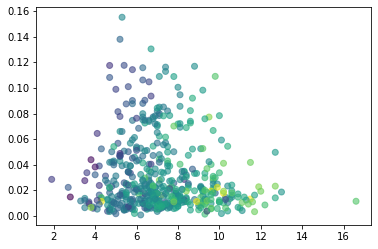

In [138]:
import matplotlib.pyplot as plt

plt.scatter(diabetes, mort, c=obese, alpha= .6)

In [ ]:
#so after some testing of the graphs, using counties with 300+ cases may not be the best. I will try with
## 1000 to see how that looks 

In [104]:
smalldf = test[test['Confirmed Cases'] > 1000]
smalldf = smalldf.drop(['Strata_ID_Number'], axis=1)

In [105]:
smalldf['Mortality Rate']= smalldf['COVID19 Deaths'] / smalldf['Confirmed Cases']

In [ ]:
smalldf

In [107]:
smalldf = smalldf.reindex(columns =['countyFIPS', 'County Name', 'State', 'population', 'Confirmed Cases', 'COVID19 Deaths', 'Mortality Rate', 'No_Exercise', 'CI_Min_No_Exercise',
 'CI_Max_No_Exercise', 'Few_Fruit_Veg', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity', 'CI_Min_Obesity', 'CI_Max_Obesity', 'High_Blood_Pres',
 'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'Smoker', 'CI_Min_Smoker', 'CI_Max_Smoker', 'Diabetes', 'CI_Min_Diabetes', 'CI_Max_Diabetes'])

In [108]:
smalldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
1,1003,Baldwin,AL,223234,2196,16,0.007286,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
23,1047,Dallas,AL,37196,1205,16,0.013278,31.5,23.9,39.1,85.9,79.4,92.4,36.6,28.8,44.5,35.0,26.0,44.0,20.4,13.9,27.0,11.5,7.2,15.7
24,1049,DeKalb,AL,71513,1377,8,0.005810,37.0,30.4,43.6,80.7,74.0,87.5,24.3,18.2,30.3,35.3,25.8,44.8,19.1,13.6,24.6,7.8,4.6,11.0
25,1051,Elmore,AL,81209,1353,33,0.024390,27.7,22.0,33.4,85.0,78.6,91.3,24.8,19.2,30.4,23.0,15.6,30.4,22.6,17.1,28.1,5.5,3.2,7.8
27,1055,Etowah,AL,102268,1471,15,0.010197,34.1,29.6,38.5,81.4,76.0,86.8,27.1,22.8,31.3,38.2,31.2,45.2,31.5,26.8,36.2,10.2,7.5,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,55059,Kenosha,WI,169561,2102,47,0.022360,19.4,15.5,23.2,79.2,73.7,84.7,26.8,22.3,31.3,25.6,19.4,31.9,29.9,25.2,34.5,4.7,2.8,6.6
2959,55079,Milwaukee,WI,945726,16777,417,0.024855,23.1,21.5,24.7,77.5,75.7,79.3,21.8,20.3,23.4,24.2,21.9,26.5,25.7,24.0,27.4,6.4,5.5,7.2
2970,55101,Racine,WI,196311,2739,69,0.025192,20.4,17.1,23.6,78.2,74.1,82.3,22.1,18.6,25.7,26.7,21.6,31.8,25.9,22.2,29.6,7.1,5.1,9.0
2972,55105,Rock,WI,163354,1228,25,0.020358,23.3,19.8,26.9,79.5,75.0,84.1,24.4,20.7,28.1,19.5,14.6,24.4,26.4,22.4,30.5,7.5,5.4,9.6


In [141]:
mort = smalldf['Mortality Rate']
noex = smalldf['No_Exercise']
fewf = smalldf['Few_Fruit_Veg']
obese = smalldf['Obesity']
highbp = smalldf['High_Blood_Pres']
smoker = smalldf['Smoker']
diabetes = smalldf['Diabetes']
cases = smalldf['Confirmed Cases']
deaths = smalldf['COVID19 Deaths']

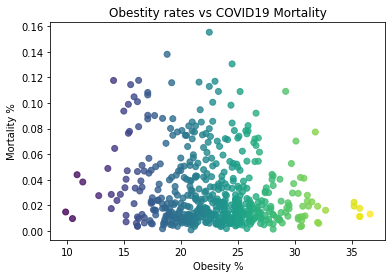

In [119]:
fig, ax = plt.subplots()
ax.set(xlabel= 'Obesity %', ylabel= 'Mortality %', title= "Obestity rates vs COVID19 Mortality")

plt.scatter(obese, mort, c=obese, alpha= .8)
plt.show()

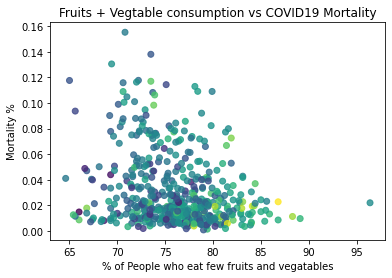

In [130]:
fig, ax = plt.subplots()
ax.set(xlabel= '% of People who eat few fruits and vegatables', ylabel= 'Mortality %', title= "Fruits + Vegtable consumption vs COVID19 Mortality")

plt.scatter(fewf, mort, c=noex, alpha= .8)
plt.show()

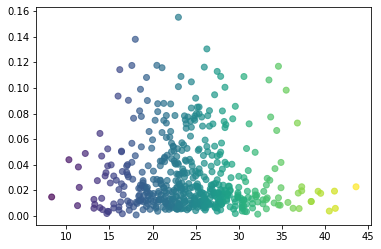

In [139]:
plt.scatter(noex, mort, c=noex, alpha= .7)
plt.show()

In [187]:
import seaborn as sns

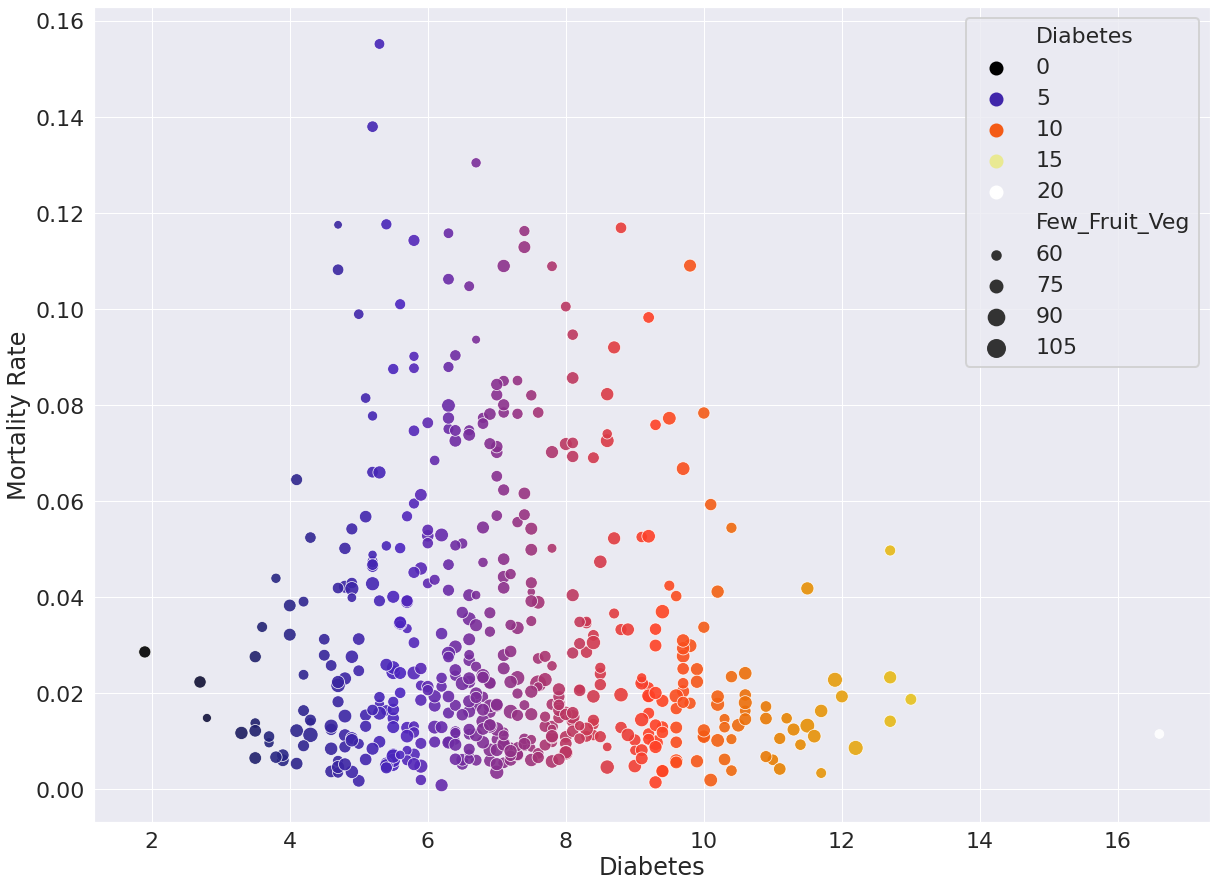

In [258]:


sns.set(style='darkgrid', font_scale= 2)

f, ax = plt.subplots(figsize=(20,15))
ax.set(xlabel='Diabetes', ylabel='Mortality Rate', )
sns.set_context('poster')
sns.scatterplot(x=diabetes, y=mort, hue=diabetes, size=fewf, palette='CMRmap', alpha=.9)
plt.show()

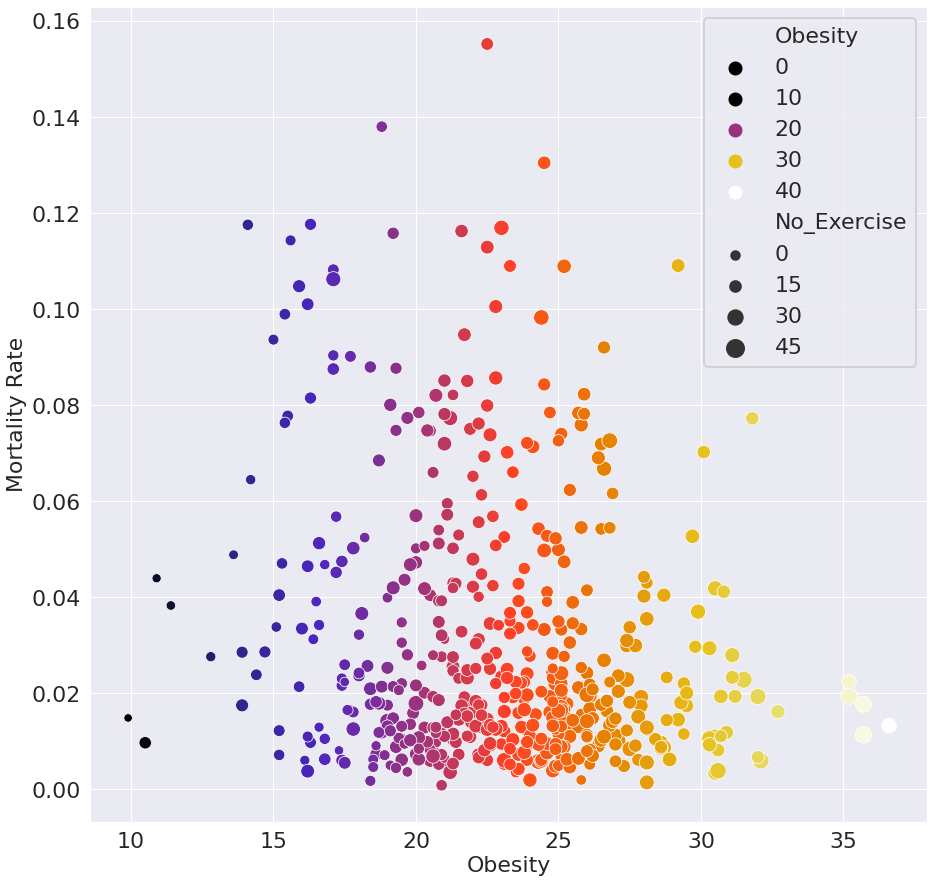

In [253]:
sns.set(style='darkgrid', font_scale=2)

f, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel('High Blood Pressure', size=22)
ax.set_ylabel('Mortality Rate', size=22)
sns.set_context('poster')

sns.scatterplot(x=obese, y=mort,size=noex, hue=obese, palette='CMRmap')
plt.show()